In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Question 1

[ -8.51668467  -2.43437105  -7.73249084  -9.34200103  -8.17674937
  -6.3802532   -8.30877504   7.67227519   9.19535174  -7.61580776
   2.50899099  -9.10987876  -9.08387069   9.16600473   9.05786244
   8.69996536   9.52616119   4.84865088   1.6859591    6.69218303
   9.40625583   2.71186858  -9.81618803   1.85858914   6.6132303
  -6.56254108   5.85832194   9.43226429 -10.35731761  -8.66588916
  -0.97831882   1.39971155  -9.86483023  -8.70068153   9.3899306
  -7.12320144  -7.4721448   -7.44624586   8.69866619  -4.38790783
  -6.53520657  -8.34152069  -3.53194297  10.39364205  -5.36252242
  -4.72859778   2.29874006   7.34886249  -3.89546742  -7.05274181]


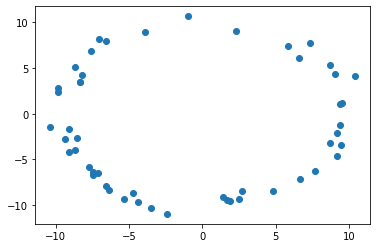

In [18]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
np . random . seed ( 0 )
N = 100
half_n = N//2
r = 10
s = r /16
t = np . random . uniform (0 , 2*np . pi , half_n )
n = s*np . random . randn ( half_n )
x , y = ( r + n)*np . cos ( t ) , ( r + n)*np . sin ( t )
X_circ = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
m, b = -1, 2
#x = np.linspace(12, 12 , half_n )
#y = m*x + b + s*np . random . randn ( half_n )
X_line = np.hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
X = np . vstack ( ( X_circ , X_line ) )
print (x)
plt.scatter(x,y)
plt.show()


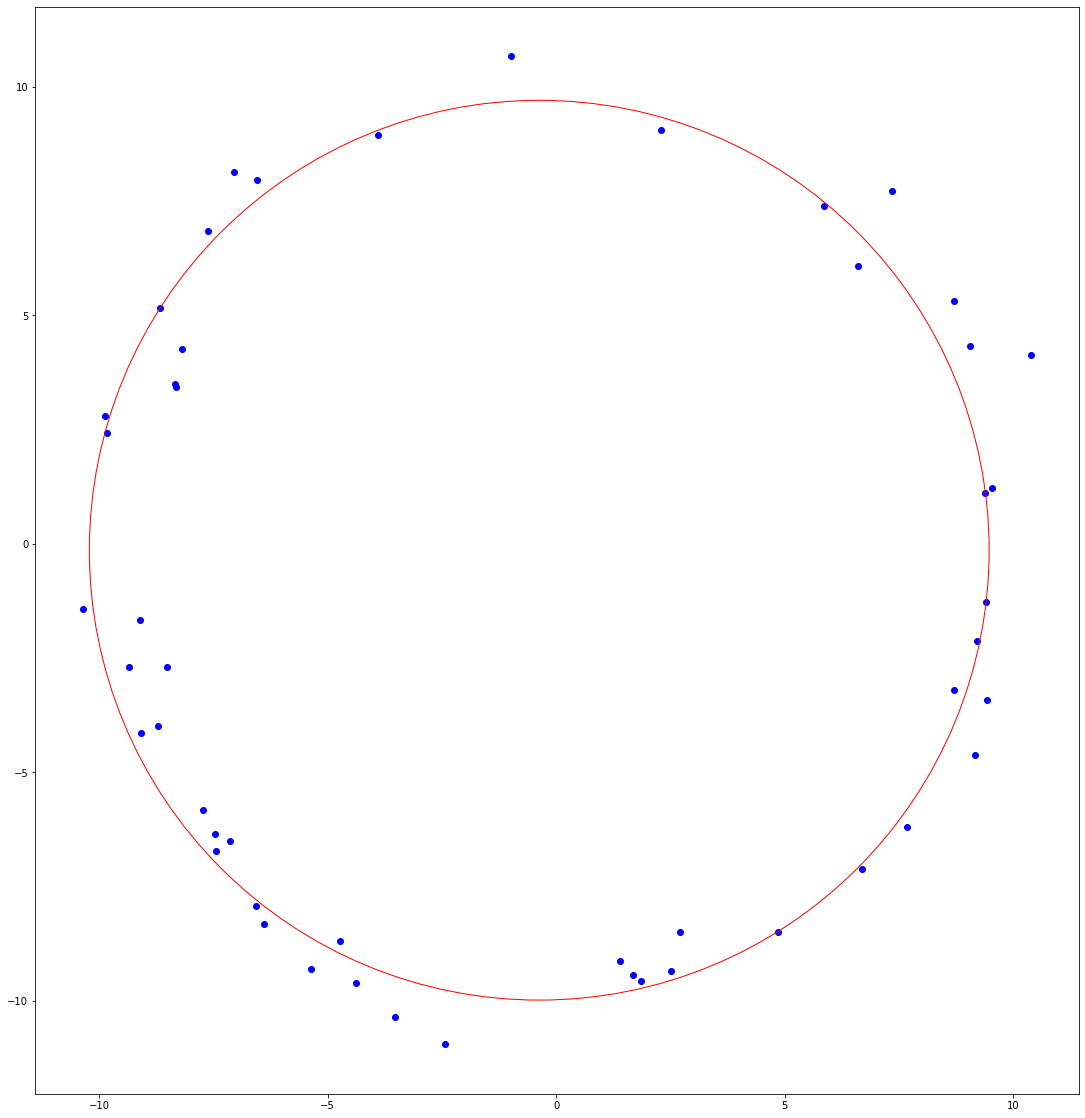

In [19]:
import numpy as np
from numpy.linalg import inv
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
def data_generator():
    np . random . seed ( 0 )
    N = 100
    half_n = N//2
    r = 10
    s = r /16
    t = np . random . uniform (0 , 2*np . pi , half_n )
    n = s*np . random . randn ( half_n )
    x_data , y_data = ( r + n)*np . cos ( t ) , ( r + n)*np . sin ( t )
    X_circ = np . hstack ( ( x_data . reshape ( half_n , 1 ) , y_data . reshape ( half_n , 1 ) ) )
    m, b = -1, 2
    #x = np.linspace(12, 12 , half_n )
    #y = m*x + b + s*np . random . randn ( half_n )
    X_line = np.hstack ( ( x_data . reshape ( half_n , 1 ) , y_data . reshape ( half_n , 1 ) ) )
    X = np . vstack ( ( X_circ , X_line ) )

    return x_data, y_data

def circle_func(a, b, r, x):
    return (np.sqrt(r**2-(x-a)**2) + b, -np.sqrt(r**2-(x-a)**2) + b)

class RANSAC:
    def __init__(self, x_data, y_data, n):
        self.x_data = x_data
        self.y_data = y_data
        self.n = n
        self.d_min = 99999
        self.best_model = None

    def random_sampling(self):
        sample = []
        save_ran = []
        count = 0

#Theory is We can generate a circle using three random points

        while True:
            ran = np.random.randint(len(self.x_data))

            if ran not in save_ran:
                sample.append((self.x_data[ran], self.y_data[ran]))
                save_ran.append(ran)
                count += 1

                if count == 3:
                    break

        return sample

    def make_model(self, sample):
       #Find A,B,C
        pt1 = sample[0]
        pt2 = sample[1]
        pt3 = sample[2]

        A = np.array([[pt2[0] - pt1[0], pt2[1] - pt1[1]], [pt3[0] - pt2[0], pt3[1] - pt2[1]]]) 
        B = np.array([[pt2[0]**2 - pt1[0]**2 + pt2[1]**2 - pt1[1]**2], [pt3[0]**2 - pt2[0]**2 + pt3[1]**2 - pt2[1]**2]])		
        inv_A = inv(A)

        c_x, c_y = np.dot(inv_A, B) / 2
        c_x, c_y = c_x[0], c_y[0]
        r = np.sqrt((c_x - pt1[0])**2 + (c_y - pt1[1])**2)

        return c_x, c_y, r

    def eval_model(self, model):
        d = 0
        c_x, c_y, r = model
        for i in range(len(self.x_data)):
            dis = np.sqrt((self.x_data[i]-c_x)**2 + (self.y_data[i]-c_y)**2)

            if dis >= r:
                d += dis - r
            else:
                d += r - dis
        return d

    def execute_ransac(self):
        # find best model
        for i in range(self.n):
            model = self.make_model(self.random_sampling())
            d_temp = self.eval_model(model)

            if self.d_min > d_temp:
                self.best_model = model
                self.d_min = d_temp


if __name__ == '__main__':
#Generate data
    x_data, y_data = data_generator()
    plt.figure(figsize=(20,20))
    # show data by scatter type
    plt.scatter(x_data, y_data, c='blue', marker='o', label='RANSAC')

    # make ransac class
    # n: how many times try sampling
    ransac = RANSAC(x_data, y_data, 50)

    # execute ransac algorithm
    ransac.execute_ransac()

    # get best model from ransac
    a, b, r = ransac.best_model[0], ransac.best_model[1], ransac.best_model[2]

    # show result
    circle = plt.Circle((a, b), radius=r, color='r', fc='y', fill=False)
    plt.gca().add_patch(circle)

    plt.axis('scaled')

    # plt.tight_layout()
    plt.show()

#  Question 2   

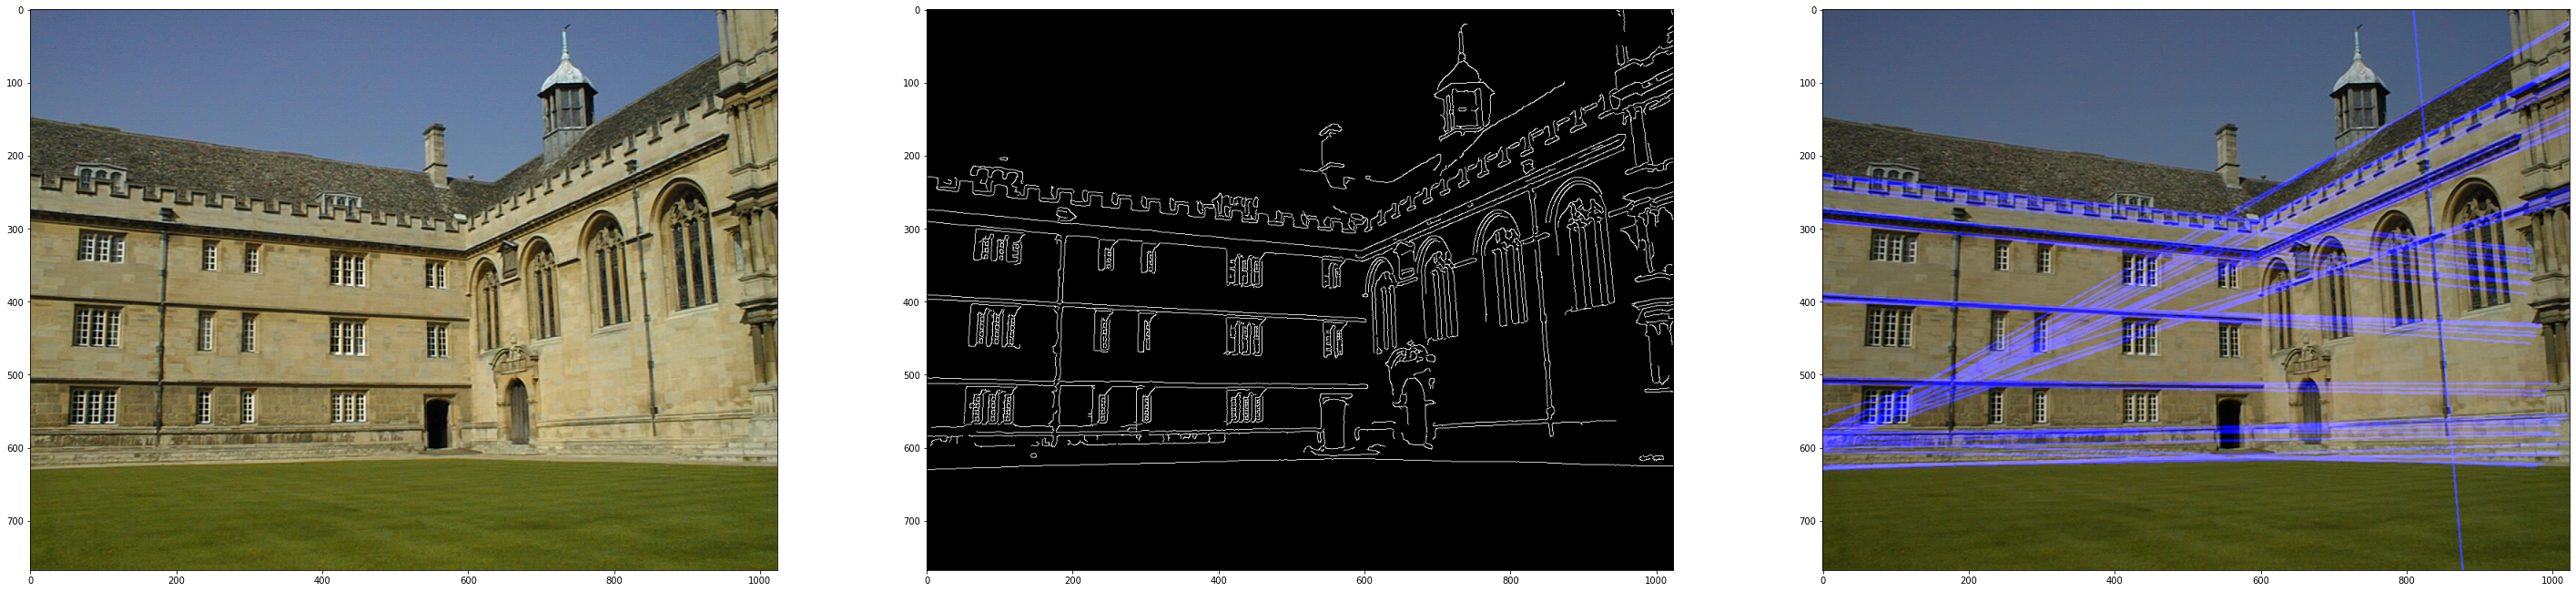

In [20]:

import matplotlib.image as mpimg

image1 = mpimg.imread("ukflag.png") 
image = mpimg.imread("003.jpg")


gray_image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
blurred_image = cv.GaussianBlur(gray_image, (9, 9), 0)
edges_image = cv.Canny(blurred_image, 50, 120)
   
rho_resolution = 1.0
theta_resolution = np.pi/180
threshold = 155

 
def draw_lines(img, houghLines, color=[0, 0, 255], thickness=2):
    for line in houghLines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
 
            cv.line(img,(x1,y1),(x2,y2),color,thickness)   
                
 
def weighted_img(img, initial_img, α=0.8, β=1.1, λ=0.):
    return cv.addWeighted(initial_img, α, img, β, λ)

hough_lines = cv.HoughLines(edges_image, rho_resolution , theta_resolution , threshold,10,50)
 
hough_lines_image = np.zeros_like(image)
draw_lines(hough_lines_image, hough_lines)
original_image_with_hough_lines = weighted_img(hough_lines_image,image)

plt.figure(figsize = (50,40))
plt.subplot(131)
plt.imshow(image)
plt.subplot(132)
plt.imshow(edges_image, cmap='gray')
plt.subplot(133)
plt.imshow(original_image_with_hough_lines, cmap='gray') 
plt.show()

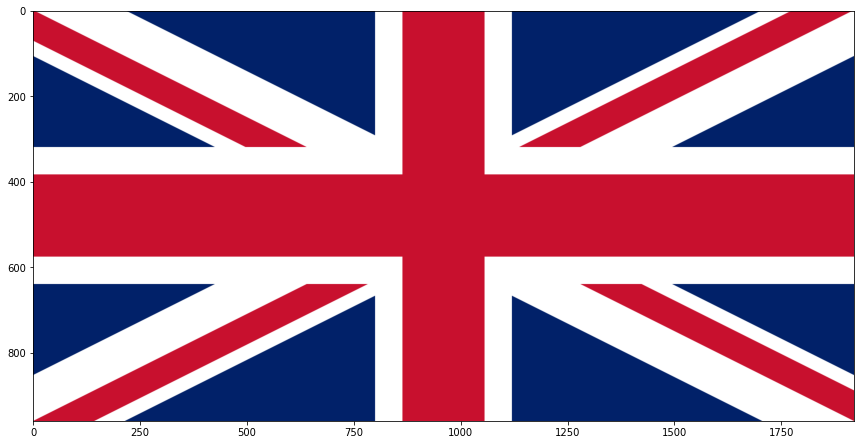

In [21]:
image1 = mpimg.imread("ukflag.png")
plt.figure(figsize = (50,40))
plt.subplot(131)
plt.imshow(image1)
plt.show()

In [22]:
# This code is to take the cordinates of the point where we want to warp the Uk Flag
import cv2

def click_event(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN: #Left Mouse button Checker
        print(x, ' ', y) #Cordinate Displaying
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(x) + ',' +
                    str(y), (x,y), font,
                    1, (255, 0, 0), 2)
        cv2.imshow('image', img) #Image will open in a new window
   
    if event==cv2.EVENT_RBUTTONDOWN: #Right Mouse button Checker
        print(x, ' ', y)
        font = cv2.FONT_HERSHEY_SIMPLEX
        b = img[y, x, 0]
        g = img[y, x, 1]
        r = img[y, x, 2]
        cv2.putText(img, str(b) + ',' +
                    str(g) + ',' + str(r),
                    (x,y), font, 1,
                    (255, 255, 0), 2)
        cv2.imshow('image', img)
 
#Main Funtion
if __name__=="__main__":
    img = cv2.imread('003.jpg', 1)#Reading Image
    cv2.imshow('image', img) #Display Image
    cv2.setMouseCallback('image', click_event)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

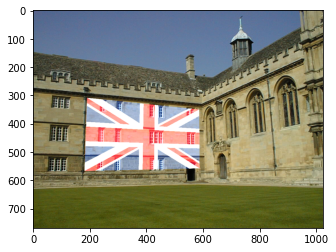

In [23]:

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from numpy.linalg import svd as svd
from numpy.linalg import norm as norm
from numpy.linalg import inv as inv
from numpy.linalg import det as det
from numpy.linalg import pinv as pinv
from datetime import datetime

img = cv.imread('ukflag.png')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
background = cv.imread('003.jpg')
background = cv.cvtColor(background,cv.COLOR_BGR2RGB)

rows,cols,ch = background.shape

pts1 = np.float32([[0,0],[1535,0],[0,790],[1535,790]]) # Cordinates of UK Flag
pts2 = np.float32([[191,309],[520, 343],[183,520],[520,520]]) # Fitting Cordinates

M = cv.getPerspectiveTransform(pts1,pts2)    
dst = cv.warpPerspective(img,M,(cols,rows))

overlay = cv.add(background, dst)

plt.imshow(overlay)
plt.show()

# Question 3

# Part a

In [24]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from numpy.linalg import svd as svd
from numpy.linalg import norm as norm
from numpy.linalg import inv as inv
from numpy.linalg import det as det
from numpy.linalg import pinv as pinv
from datetime import datetime


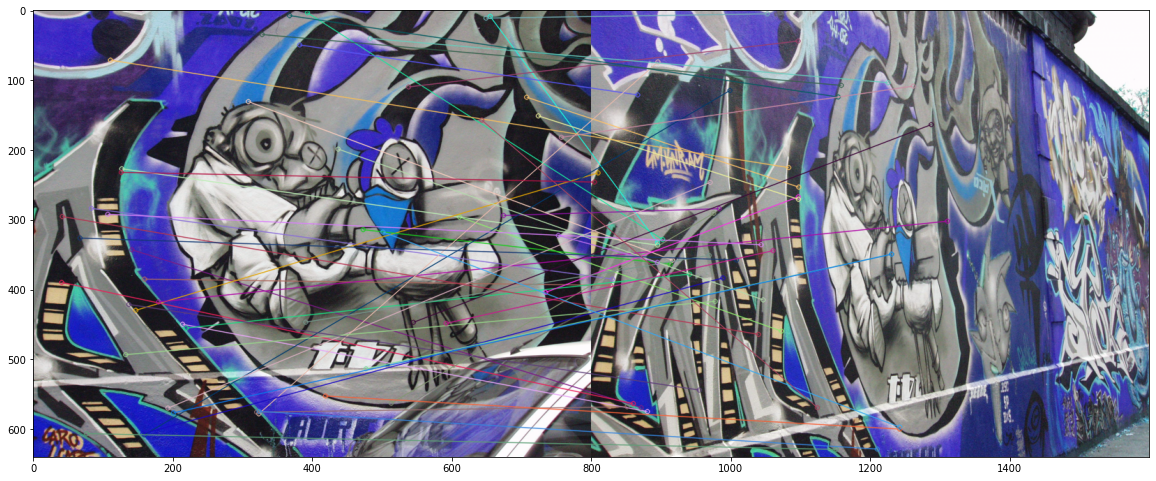

In [25]:
#Question 3
#part a

 
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv.imread('img1.ppm')  
img2 = cv.imread('img5.ppm') 

img1 = cv.cvtColor(img1, cv.IMREAD_COLOR)#COLOR_BGR2GRAY
img2 = cv.cvtColor(img2, cv.IMREAD_COLOR)

#sift
sift = cv.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)
plt.figure(figsize=(20,20))
img3 = cv.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3)
plt.show()

# Part b

Shape of Image  (640, 800, 3)


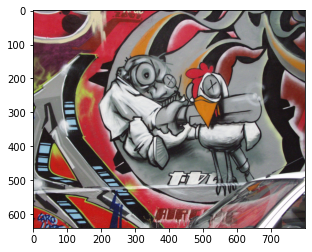

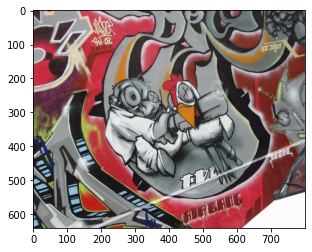

In [26]:
im1=cv.imread("img1.ppm")
print("Shape of Image ",im1.shape)
plt.imshow(im1[:,:,::-1])
plt.figure()
im2=cv.imread("img2.ppm")
plt.imshow(im2[:,:,::-1])
images=[im1,im2]

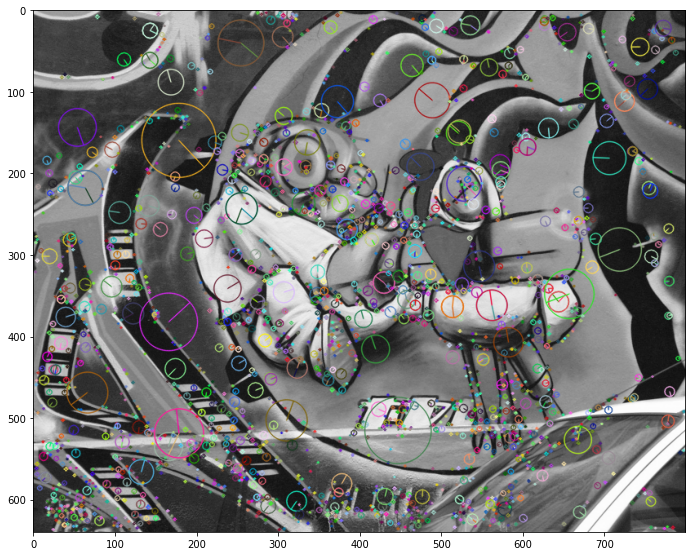

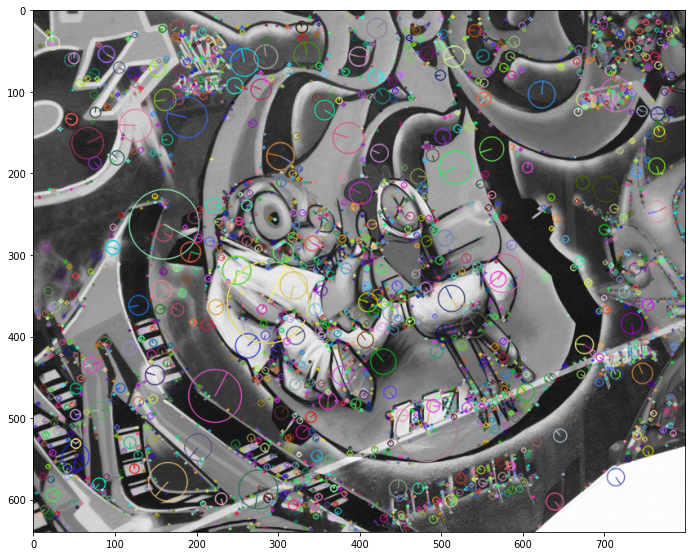

In [27]:
keypoints=[]
descriptions=[]
for im in images:
    gray=cv.cvtColor(im,cv.COLOR_RGB2GRAY)
    sift=cv.xfeatures2d.SIFT_create()
    kp,des=sift.detectAndCompute(gray,None)
    keypoints.append(kp)
    descriptions.append(des)
    plt.figure(figsize=(6*2,4.8*2))
    out=cv.drawKeypoints(gray,kp,gray,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.imshow(out)

Number of Matches 1360


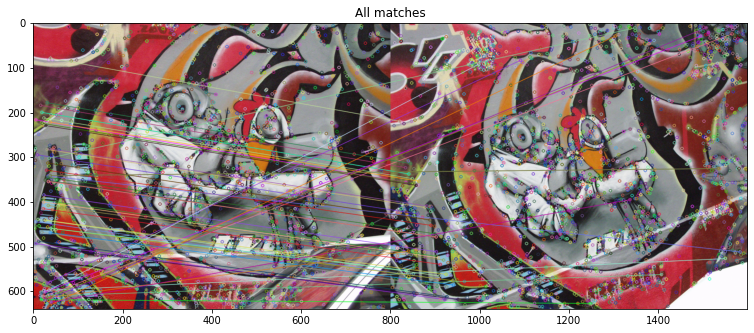

In [41]:
bf=cv.BFMatcher(crossCheck=True)
matches= bf.match(descriptions[0],descriptions[1])
print("Number of Matches",len(matches))
matched_image=cv.drawMatches(images[0][:,:,::-1],keypoints[0],images[1][:,:,::-1],keypoints[1],matches[:50],None)
plt.figure(figsize=(6.4*2,4.8*2))
plt.title("All matches")
plt.imshow(matched_image)
plt.show()

In [42]:
#Calibrated Cordinates
f=550
u0=307.5
v0=205
k=np.array([[f,0,u0],[0,f,v0],[0,0,1]])
uncalibrated_1=[[keypoints[0][match.queryIdx].pt[0],keypoints[0][match.queryIdx].pt[1],1] for match in matches]
uncalibrated_2=[[keypoints[1][match.trainIdx].pt[0],keypoints[1][match.trainIdx].pt[1],1] for match in matches]          
                
uncalibrated_1=np.array(uncalibrated_1).T
uncalibrated_2=np.array(uncalibrated_2).T
k_inv=np.linalg.inv(k)
 
                
calibrated_1=np.matmul(k_inv,uncalibrated_1).T
calibrated_2=np.matmul(k_inv,uncalibrated_2).T

                

In [43]:
def least_square(X1,X2):
    A=X1[:,0]*X2.T
    B=X1[:,1]*X2.T
    C=X1[:,2]*X2.T
    mat=np.hstack((A.T,B.T,C.T))
    U,S,V=svd(mat)
    E=(V.T)[:,-1].reshape(3,3)
    U,S,V=svd(E)
    d=np.diag([1,1,0])
    E=(U@d@V).T

    return E
E_least=least_square(calibrated_1,calibrated_2)
print(E_least)
print(np.around(E_least,2))

[[-0.42429051  0.82506278 -0.25251613]
 [-0.78786638 -0.42835624  0.28887457]
 [ 0.42235146 -0.09222639 -0.03044823]]
[[-0.42  0.83 -0.25]
 [-0.79 -0.43  0.29]
 [ 0.42 -0.09 -0.03]]


1000/10000 11:42:19
2000/10000 11:42:31
3000/10000 11:42:43
4000/10000 11:43:00
5000/10000 11:43:14
6000/10000 11:43:25
7000/10000 11:43:37
8000/10000 11:43:51
9000/10000 11:44:03
10000/10000 11:44:15
E_ransac
[[-0.09  0.98 -0.1 ]
 [-0.97 -0.1   0.13]
 [ 0.18 -0.12 -0.01]]
Num Inliers (291,)


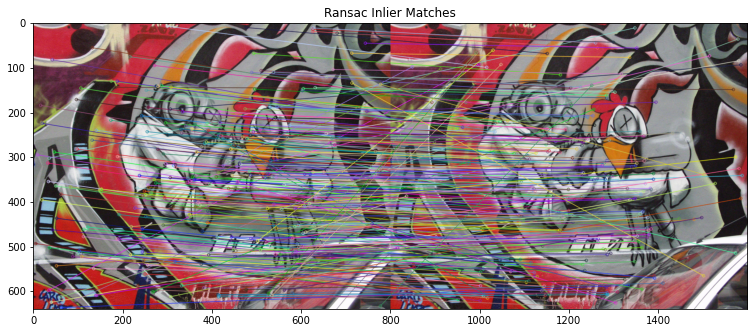

In [45]:
def ransac(X1,X2):
    
    iterations=10000
    sample_size=4
    eps=10**-4
    best_num_inlier=-1
    best_inlier=None
    best_E=None
    for iter in range(iterations):
        permuted_indices=np.random.permutation(np.arange(X1.shape[0]-1))
        sample_indices=permuted_indices[:sample_size]
        test_indices=permuted_indices[sample_size:]
        inlier_arr=[]
        X1_sample=X1[sample_indices]
        X2_sample=X2[sample_indices]
        X1_test=X1[test_indices]
        X2_test=X2[test_indices]
        E=least_square(X1_sample,X2_sample)
        img1=np.square(np.diag(X2_test @ (E@(X1_test.T))))/np.square(np.linalg.norm(np.cross([0,0,1],[0,1,0])))
        img2=np.square(np.diag(X1_test @ (E.T@(X1_test.T))))/np.square(np.linalg.norm(np.cross([0,0,1],[0,1,0])))
        
        res=img1+img2
        inliers=np.where(res<eps)[0]
        if inliers.shape[0]>best_num_inlier:
            best_num_inlier=inliers.shape[0]
            best_E=E
            best_inliers=inliers
            
        if (iter+1)%1000==0:
            now=datetime.now()
            current_time=now.strftime("%H:%M:%S")
            print(str(iter+1)+"/"+str(iterations)+ " "+str(current_time))
            
    return best_E,best_inliers
E_ransac,inliers= ransac(calibrated_1,calibrated_2)
print("E_ransac")
print(np.around(E_ransac,2))
print("Num Inliers",inliers.shape)
inlier_matches=[matches[i] for i in inliers]
matched_image=cv2.drawMatches(images[0][:,:,::-1],
                             keypoints[0],img1[:,:,::-1],keypoints[1],inlier_matches,None,flags=2)
plt.figure(figsize=(6.4*2,4.8*2))
plt.title("Ransac Inlier Matches")
plt.imshow(matched_image)
plt.show()
        
    

# Part c

[[ 6.6378505e-01  6.8003334e-01 -3.1230335e+01]
 [-1.4495500e-01  9.7128304e-01  1.4877420e+02]
 [ 4.2518504e-04 -1.3930359e-05  1.0000000e+00]]


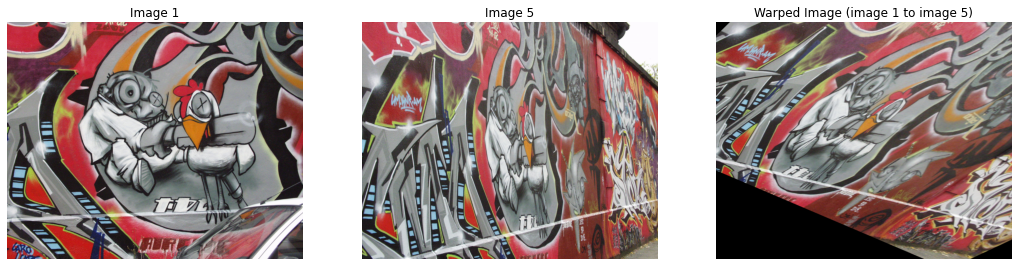

In [17]:
import cv2 as cv
import numpy as np
im1=cv.imread("img1.ppm",cv.IMREAD_ANYCOLOR)
im5=cv.imread("img5.ppm",cv.IMREAD_ANYCOLOR)
H = []
with open(r'H1to4p') as f:
    H = np.array([[float(h) for h in line.split()] for line in f])
im1to5 = cv.warpPerspective(im5, np.linalg.inv(H), (2000, 2000))
print(H)
fog, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
ax[0].set_title("Image 1")
ax[0].axis("off")
ax[1].imshow(cv.cvtColor(im5, cv.COLOR_BGR2RGB))
ax[1].set_title("Image 5")
ax[1].axis("off")
ax[2].imshow(cv.cvtColor(im1to5[:800, :1000], cv.COLOR_BGR2RGB))
ax[2].set_title("Warped Image (image 1 to image 5)")
ax[2].axis("off")
plt.show()